In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [143]:
# Load the datasets
data_df = pd.read_csv('data.csv')
petfinder_df = pd.read_csv('petfinder.csv')


In [144]:
# Encoding categorical variables in the training dataset
le = LabelEncoder()
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        data_df[column] = le.fit_transform(data_df[column])


In [145]:
# Splitting the dataset into features and target
X = data_df.drop('IsAdopted', axis=1)
y = data_df['IsAdopted']


In [146]:
# Identifying the common features between the two datasets
common_features = set(X.columns).intersection(set(petfinder_df.columns))


In [147]:
# Selecting only common features for training
X = X[list(common_features)]


In [148]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [149]:
# Creating and training the Decision Tree model
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=20,  
    min_samples_split=10, # Minimum number of samples required to split an internal node
    min_samples_leaf=5,   # Minimum number of samples required to be at a leaf node
)
dt_classifier.fit(X_train, y_train)

# Get feature importances
importances = dt_classifier.feature_importances_

In [150]:
# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(importances)[::-1]


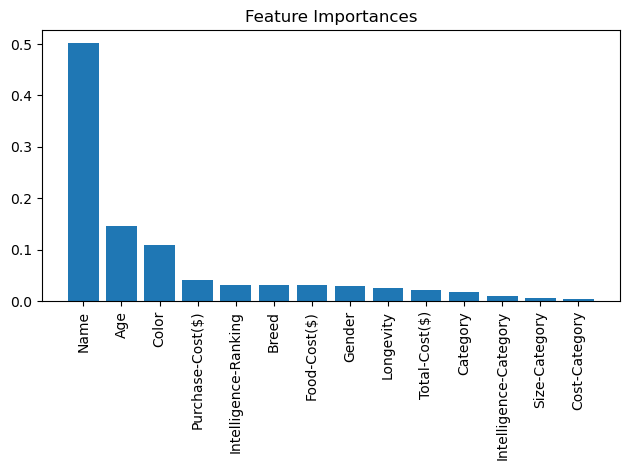

In [151]:
# Visualize the feature importances
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [152]:
# Predicting on the test set and evaluating the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6166083916083916
              precision    recall  f1-score   support

       False       0.62      0.64      0.63      8742
        True       0.61      0.59      0.60      8418

    accuracy                           0.62     17160
   macro avg       0.62      0.62      0.62     17160
weighted avg       0.62      0.62      0.62     17160



Accuracy: 0.6166083916083916
              precision    recall  f1-score   support

       False       0.62      0.64      0.63      8742
        True       0.61      0.59      0.60      8418

    accuracy                           0.62     17160
   macro avg       0.62      0.62      0.62     17160
weighted avg       0.62      0.62      0.62     17160



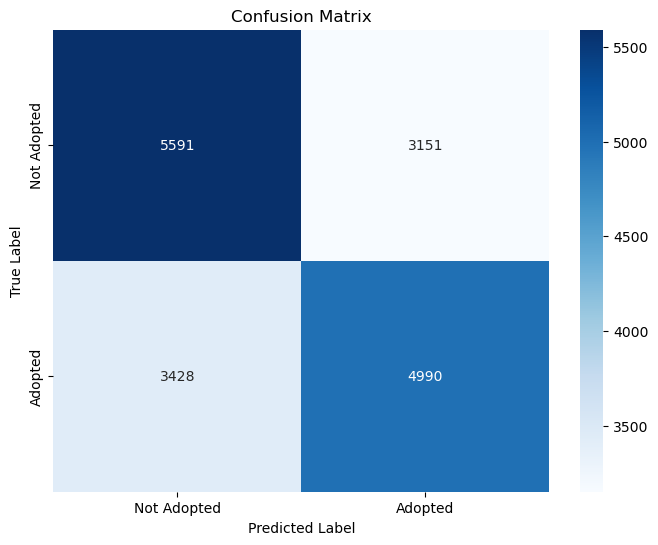

In [153]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


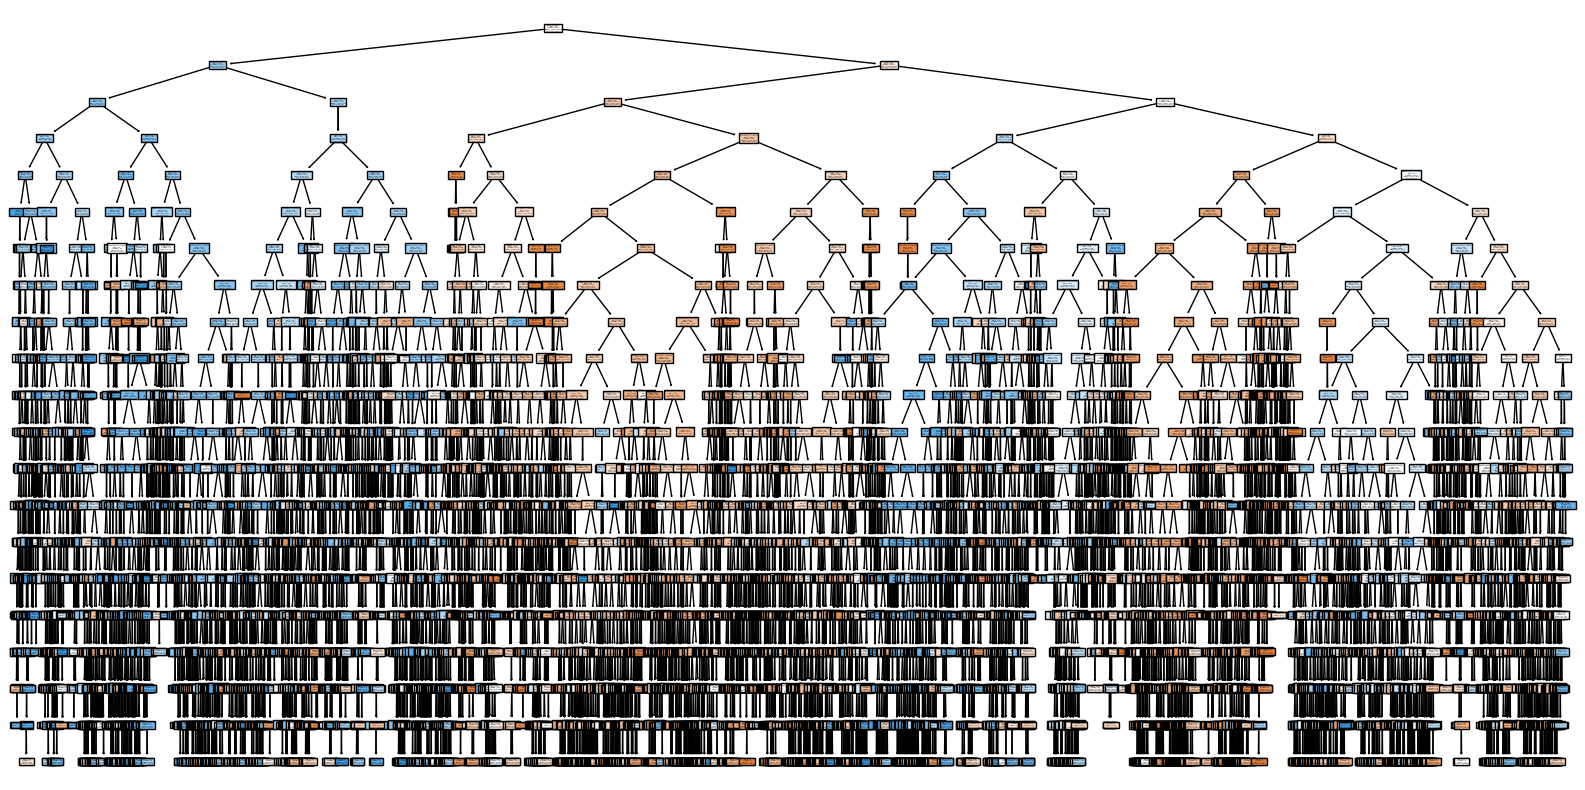

In [154]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ensure 'dt_classifier' is the trained Decision Tree classifier
# and 'X_train' is the training data used to train the model.

# Visualizing the decision tree
plt.figure(figsize=(20,10))  # Set this appropriately to the size you need
plot_tree(dt_classifier, filled=True, feature_names=list(X_train.columns), class_names=["Not Adopted", "Adopted"])
plt.savefig('decision_tree.png')  # Saves the figure into a file
plt.show()


# Conclusion:

The decision tree model highlights that age and color are pivotal in determining dogs' adoption from the shelter. Other features like purchase cost, intelligence ranking, breed, food cost, gender, longevity are also impacting the adoption decision. Younger dogs and certain colored dogs are favored. The model suggests prioritizing healthcare and promoting long-term residents to improve adoption rates.